In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [5]:
imagePaths = 'Dataset\\'
label_list = ['Belimbing Wuluh', 'Lidah Buaya']
data = []
labels = []

In [6]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [7]:
np.array(data).shape

(100, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [8]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [9]:
print(labels)

['Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh' 'Belimbing Wuluh'
 'Belimbing Wuluh' 'Belimbing Wuluh' 'Lidah Buaya' 'Lidah Buaya'
 'Lidah Buaya' 'Lidah Buaya' 'Lidah Buaya' 'Lidah Buaya' 'L

In [10]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


<h3>5. Build ANN Architecture</h3>

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [15]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [16]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [17]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 2s 309ms/step - loss: 0.7029 - accuracy: 0.6000 - val_loss: 1.1572 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 123ms/step - loss: 1.0794 - accuracy: 0.5500 - val_loss: 1.2533 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 144ms/step - loss: 1.4335 - accuracy: 0.4500 - val_loss: 0.7792 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 120ms/step - loss: 0.5831 - accuracy: 0.7250 - val_loss: 0.6572 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 129ms/step - loss: 0.7359 - accuracy: 0.5125 - val_loss: 0.5404 - val_accuracy: 0.9000
Epoch 6/100
3/3 [==============================] - 0s 172ms/step - loss: 0.5295 - accuracy: 0.8000 - val_loss: 1.5673 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 121ms/step - loss: 0.6900 - accuracy: 0.7125 - val_loss: 0.7577 - val_accuracy: 0.4500
Epoch 8/100
3

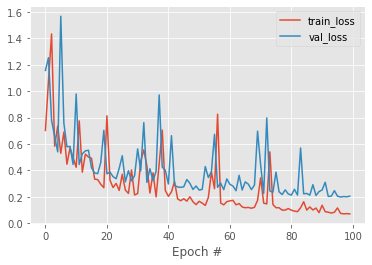

In [18]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [19]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

                 precision    recall  f1-score   support

Belimbing Wuluh       0.85      0.92      0.88        12
    Lidah Buaya       0.86      0.75      0.80         8

       accuracy                           0.85        20
      macro avg       0.85      0.83      0.84        20
   weighted avg       0.85      0.85      0.85        20



C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_18792/954476436.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [21]:
# uji model menggunakan image lain
queryPath = imagePaths+'Belimbing_Wuluh.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.64990735]]


In [ ]:
if q_pred<=0.5 :
    target = "Lidah_Buaya"
else :
    target = "Belimbing_Wuluh"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose